In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as sts
import statsmodels.api as sm
import warnings

from statsmodels.tools.eval_measures import mse, rmse
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import winsorize
from sklearn.metrics import mean_absolute_error
from scipy.stats import jarque_bera, normaltest, bartlett, levene
from sqlalchemy import create_engine
from sklearn import linear_model

warnings.filterwarnings('ignore')

Veri setimiz için test verisi hâlihazırda verilmiş olduğu için ayrıca test verisi ayırmamıza gerek yok.

EĞİTİM VERİSİ

In [2]:
knt=pd.read_csv(".\\konut_train.csv")

kategorik=[i for i in knt.columns if knt[i].dtype=="object"]
surekli=[i for i in knt.columns if (knt[i].dtype=="int64" or knt[i].dtype=="float64")]

konut=knt
for i in kategorik:
    konut[i]=knt[i].fillna("Null")
for i in surekli:
    konut[i]=knt[i].fillna(0)

TEST VERİSİ

In [15]:
knt_test=pd.read_csv(".\\konut_test.csv")

kategorik_test=[i for i in knt_test.columns if knt_test[i].dtype=="object"]
surekli_test=[i for i in knt_test.columns if (knt_test[i].dtype=="int64" or knt_test[i].dtype=="float64")]

konut_test=knt_test
for i in kategorik_test:
    konut_test[i]=knt_test[i].fillna("Null")
for i in surekli_test:
    konut_test[i]=knt_test[i].fillna(0)

In [18]:
konut_fiyat=pd.read_csv(".\\konut_price.csv")

In [21]:
konut_test["SalePrice"]=[i for i in konut_fiyat[konut_test["Id"]==konut_fiyat["Id"]]["SalePrice"]]

In [26]:
Y_test=konut_test["SalePrice"]

### 1inci Model:

- Eğitim

In [9]:
Y_egt=konut["SalePrice"]
X1=konut[["YearBuilt", "TotalBsmtSF", "TotRmsAbvGrd", "LotFrontage"]]

X1=sm.add_constant(X1)
sonuc1=sm.OLS(Y_egt, X1).fit()

- Kontrol

In [25]:
X1_test=konut_test[["YearBuilt", "TotalBsmtSF", "TotRmsAbvGrd", "LotFrontage"]]

X1_test=sm.add_constant(X1_test)
sonuc1_tahmin=sonuc1.predict(X1_test)

### 2nci Model:

- Eğitim

In [28]:
Y_egt=konut["SalePrice"]
X2=konut[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]]

X2=sm.add_constant(X2)
sonuc2=sm.OLS(Y_egt, X2).fit()

- Kontrol

In [31]:
X2_test=konut_test[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea"]]

X2_test=sm.add_constant(X2_test)
sonuc2_tahmin=sonuc2.predict(X2_test)

### 3üncü Model:

- Eğitim

In [11]:
Y_egt=konut["SalePrice"]
X3=konut[["OverallQual", "GarageCars", "YearBuilt", "GrLivArea", "FullBath", "Fireplaces"]]

X3=sm.add_constant(X3)
sonuc3=sm.OLS(Y_egt, X3).fit()

- Kontrol

In [35]:
X3_test=konut_test[["OverallQual", "GarageCars", "YearBuilt", "GrLivArea", "FullBath", "Fireplaces"]]

X3_test=sm.add_constant(X3_test)
sonuc3_tahmin=sonuc3.predict(X3_test)

### 4üncü Model:

- Eğitim

In [12]:
konut["LivingArea"]=konut["GrLivArea"] * konut["MasVnrArea"]

Y_egt=konut["SalePrice"]
X4=konut[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "LivingArea"]]

X4=sm.add_constant(X4)
sonuc4=sm.OLS(Y_egt, X4).fit()

- Kontrol

In [37]:
konut_test["LivingArea"]=konut["GrLivArea"] * konut["MasVnrArea"]

X4_test=konut_test[["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "LivingArea"]]

X4_test=sm.add_constant(X4_test)
sonuc4_tahmin=sonuc4.predict(X4_test)

### SONUÇ

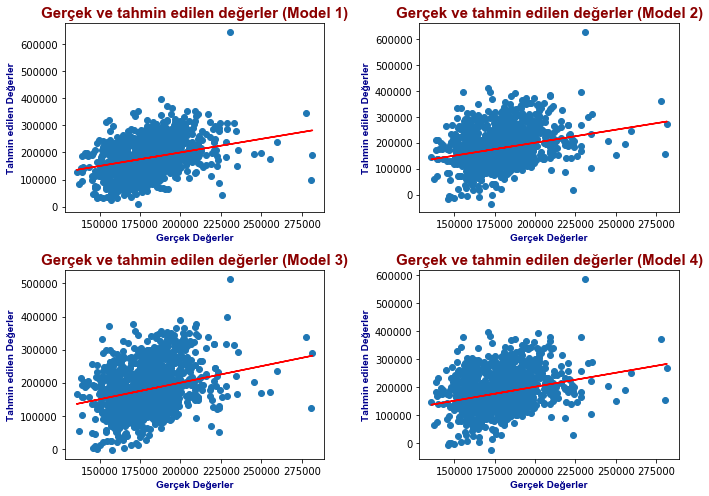

------- 1inci MODEL -------
Ortalama Mutlak Hata (MAE)        : 46229.633356855615
Ortalama Kare Hata (MSE)          : 3289968419.888642
Kök Ortalama Kare Hata (RMSE)     : 57358.24631113334
Ortalama Mutlak Yüzde Hata (MAPE) : 25.95917250442386


------- 2nci MODEL --------
Ortalama Mutlak Hata (MAE)        : 51407.19132836199
Ortalama Kare Hata (MSE)          : 4231348726.975519
Kök Ortalama Kare Hata (RMSE)     : 65048.81802904276
Ortalama Mutlak Yüzde Hata (MAPE) : 28.951557741458835


------- 3üncü MODEL -------
Ortalama Mutlak Hata (MAE)        : 54657.99343979457
Ortalama Kare Hata (MSE)          : 4386228500.749752
Kök Ortalama Kare Hata (RMSE)     : 66228.60787265388
Ortalama Mutlak Yüzde Hata (MAPE) : 30.703018805121356


------- 4üncü MODEL -------
Ortalama Mutlak Hata (MAE)        : 48900.54058549387
Ortalama Kare Hata (MSE)          : 3806194932.6603866
Kök Ortalama Kare Hata (RMSE)     : 61694.36710640921
Ortalama Mutlak Yüzde Hata (MAPE) : 27.544237164806855


In [81]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.scatter(Y_test, sonuc1_tahmin)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Gerçek ve tahmin edilen değerler (Model 1)", fontdict=baslik_font)

plt.subplot(2,2,2)
plt.scatter(Y_test, sonuc2_tahmin)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Gerçek ve tahmin edilen değerler (Model 2)", fontdict=baslik_font)

plt.subplot(2,2,3)
plt.scatter(Y_test, sonuc3_tahmin)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Gerçek ve tahmin edilen değerler (Model 3)", fontdict=baslik_font)

plt.subplot(2,2,4)
plt.scatter(Y_test, sonuc4_tahmin)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Gerçek ve tahmin edilen değerler (Model 4)", fontdict=baslik_font)

plt.tight_layout()
plt.show()

print("------- 1inci MODEL -------")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(Y_test, sonuc1_tahmin)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(Y_test, sonuc1_tahmin)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(Y_test, sonuc1_tahmin)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((Y_test - sonuc1_tahmin) / Y_test)) * 100))
print("\n")

print("------- 2nci MODEL --------")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(Y_test, sonuc2_tahmin)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(Y_test, sonuc2_tahmin)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(Y_test, sonuc2_tahmin)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((Y_test - sonuc2_tahmin) / Y_test)) * 100))
print("\n")

print("------- 3üncü MODEL -------")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(Y_test, sonuc3_tahmin)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(Y_test, sonuc3_tahmin)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(Y_test, sonuc3_tahmin)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((Y_test - sonuc3_tahmin) / Y_test)) * 100))
print("\n")

print("------- 4üncü MODEL -------")
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(Y_test, sonuc4_tahmin)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(Y_test, sonuc4_tahmin)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(Y_test, sonuc4_tahmin)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((Y_test - sonuc4_tahmin) / Y_test)) * 100))

### DEĞERLENDİRME:

Dağılım açısından, grafiklerin birbirinden belirgin bir farkı yoktur. Ancak, verileri açısından incelendiğinde, tüm testlerde en düşük değeri alan

1İNCİ MODELİMİZ EN İYİ MODELDİR.